In [1]:
from mapf import *
from rcbs import *
from matplotlib import pyplot as plt
import numpy as np

In [2]:
env = GridWorld((10,10), [])
x = {}
goals = {}
action_generator = GridWorldActionGenerator(env)
a = action_generator.actions
root = CBSNode(x, goals)
node, lb = conflict_based_search(root, a, 1.05, verbose=True)

CBS popped from F
CBS solution found


In [3]:
N_agents = 20
start_pos = []
goal_pos = []
x = {}
goals = {}
for id in range(N_agents):
    choices = [p for p in env.G.nodes if p not in start_pos]
    p = choices[np.random.choice(len(choices))]
    start_pos.append(p)
    x[id] = PathVertex(p, 0)
    choices = [p for p in env.G.nodes if p not in goal_pos]
    p = choices[np.random.choice(len(choices))]
    goal_pos.append(p)
    goals[id] = LocationGoal(p)

root = CBSNode(x, goals)
node, lb = conflict_based_search(root, a, 1.05, verbose=True)

CBS popped from F
Current conflict count 5
Applying constraint t = 6, p = (6, 3) to 8
Applying constraint t = 5, p1 = (7, 3), p2 = (6, 3) to 1
CBS popped from F
Current conflict count 4
Applying constraint t = 5, p1 = (3, 4), p2 = (3, 5) to 9
Applying constraint t = 5, p1 = (3, 5), p2 = (3, 4) to 2
CBS popped from F
Current conflict count 2
Applying constraint t = 1, p = (3, 6) to 12
Applying constraint t = 0, p1 = (2, 6), p2 = (3, 6) to 5
CBS popped from F
Current conflict count 1
Applying constraint t = 1, p = (1, 6) to 13
Applying constraint t = 0, p1 = (1, 7), p2 = (1, 6) to 11
CBS popped from F
Current conflict count 1
Applying constraint t = 2, p = (1, 5) to 13
Applying constraint t = 1, p1 = (1, 6), p2 = (1, 5) to 11
CBS popped from F
Current conflict count 2
Applying constraint t = 3, p = (1, 4) to 13
Applying constraint t = 2, p1 = (1, 5), p2 = (1, 4) to 11
CBS popped from F
Current conflict count 1
Applying constraint t = 3, p = (2, 6) to 13
Applying constraint t = 2, p1 = (2

In [4]:
print(node.cost)
print(lb)
print(1.1*lb)
print(node.lower_bound)

144
142
156.20000000000002
144


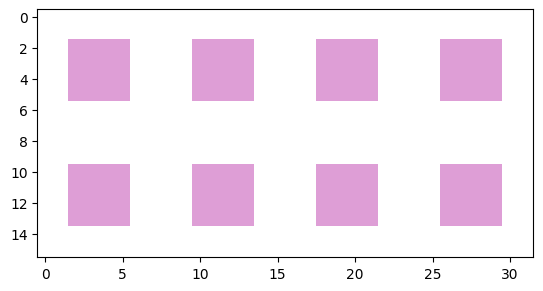

In [5]:
env = ColumnLatticeEnvironment(1,2,4,4,2,2,2,2)
fig, ax = plt.subplots()
draw_environment(ax,env,{},{})

In [6]:
x = {
    0: PathVertex((7,10), 0),
    1: PathVertex((7,22), 0)
}
final_goals = {
    0: (7,22),
    1: (7,10)
}
region_paths = {
    0: [(0,0),(0,1)],
    1: [(0,1),(0,0)]
}
root = init_rcbs(env, x, final_goals, region_paths)
foo = regional_cbs(root, env, 1.05, verbose=True)
# solution = foo.make_solution()

Branching at region (0, 1) with constraint t = 5, p1 = (7, 17), p2 = (7, 16) applied to agent 1
Branching at region (0, 0) with constraint t = 5, p1 = (7, 15), p2 = (7, 16) applied to agent 0
Branching at region (0, 1) with constraint t = 5, p1 = (7, 17), p2 = (7, 16) applied to agent 1
Branching at region (0, 0) with constraint t = 5, p1 = (7, 15), p2 = (7, 16) applied to agent 0
# of completed trips 0
advancing agents...
# of completed trips 2
advancing agents...
RCBS successful


(80, 80)
69.2820323027551


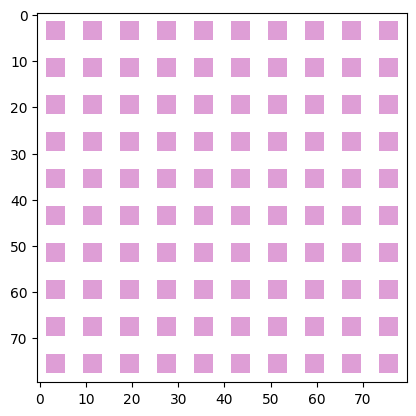

In [14]:
nrows = 5
ncols = 5
env = ColumnLatticeEnvironment(nrows, ncols, 4, 4, 2, 2, 2, 2)
size = env.gridworld.size
print(size)
print(np.sqrt(size[0]*size[1]-len(env.gridworld.obstacles)))
fig, ax = plt.subplots()
draw_environment(ax,env,{},{})

In [57]:
# N_agents = int(2*np.sqrt(size[0]*size[1]-len(env.gridworld.obstacles)))
N_agents = 120
print(N_agents)
x, final_goals, region_paths = random_problem(N_agents, env, path_cutoff = nrows+ncols)

120


In [58]:
omega = 1.1
root = init_rcbs(env, x, final_goals, region_paths)
M = regional_cbs(root, env, omega, verbose = True, maxtime = 240.)

# of completed trips 0
advancing agents...
Branching at region (1, 1) with constraint t = 14, p1 = (31, 16), p2 = (31, 15) applied to agent 82
Branching at region (1, 0) with constraint t = 14, p1 = (31, 15), p2 = (31, 16) applied to agent 4
Branching at region (1, 3) with constraint t = 20, p1 = (16, 48), p2 = (16, 47) applied to agent 14
Branching at region (0, 2) with constraint t = 20, p1 = (15, 47), p2 = (16, 47) applied to agent 117
Branching at region (2, 0) with constraint t = 13, p1 = (32, 15), p2 = (31, 15) applied to agent 100
Branching at region (1, 0) with constraint t = 13, p1 = (31, 14), p2 = (31, 15) applied to agent 4
Branching at region (3, 3) with constraint t = 19, p1 = (63, 48), p2 = (63, 47) applied to agent 37
Branching at region (3, 2) with constraint t = 19, p1 = (63, 46), p2 = (63, 47) applied to agent 80
Branching at region (3, 3) with constraint t = 28, p1 = (48, 49), p2 = (47, 49) applied to agent 38
Branching at region (2, 3) with constraint t = 28, p1 = (

KeyboardInterrupt: 

In [10]:
M.cost

6552

In [11]:
goals = {id: LocationGoal(final_goals[id]) for id in x}
root = CBSNode(x, goals)
action_gen = GridWorldActionGenerator(env.gridworld)
N, lb = conflict_based_search(root, action_gen.actions, omega, verbose=True, maxtime=600)

CBS popped from F
Current conflict count 88
Applying constraint t = 10, p1 = (56, 50), p2 = (56, 49) to 7
Applying constraint t = 10, p1 = (56, 49), p2 = (56, 50) to 6
CBS popped from F
Current conflict count 85
Applying constraint t = 13, p = (32, 17) to 11
Applying constraint t = 12, p1 = (32, 16), p2 = (32, 17) to 4
CBS popped from F
Current conflict count 84
Applying constraint t = 22, p = (19, 65) to 18
Applying constraint t = 21, p1 = (20, 65), p2 = (19, 65) to 2
CBS popped from F
Current conflict count 82
Applying constraint t = 27, p = (8, 56) to 32
Applying constraint t = 26, p1 = (8, 55), p2 = (8, 56) to 26
CBS popped from F
Current conflict count 80
Applying constraint t = 13, p = (33, 7) to 43
Applying constraint t = 12, p1 = (32, 7), p2 = (33, 7) to 40
CBS popped from F
Current conflict count 73
Applying constraint t = 4, p = (60, 40) to 44
Applying constraint t = 3, p1 = (60, 39), p2 = (60, 40) to 3
CBS popped from F
Current conflict count 71
Applying constraint t = 7, p 

149


MovieWriter ffmpeg unavailable; using Pillow instead.


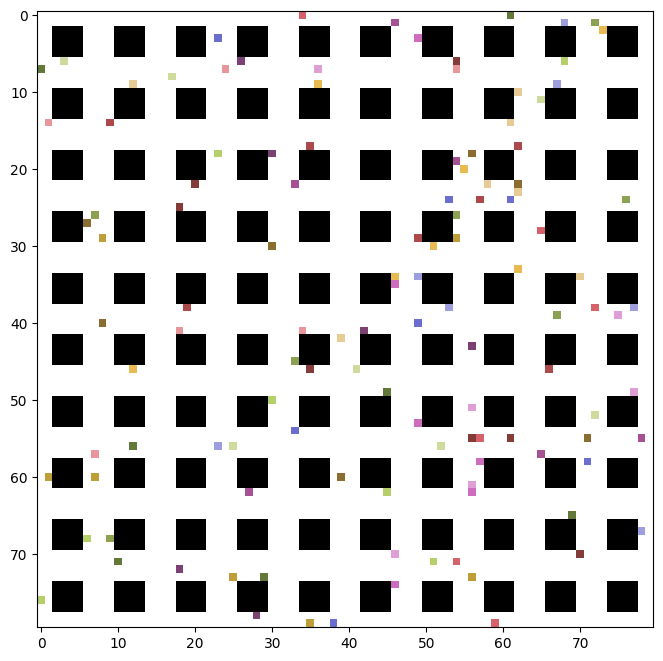

In [13]:
solution = M.make_solution()
MAPFAnimation(env, solution).animate().save('foo.gif')